## Gráficos
- Importações 

In [1]:
# Libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Base de Dados

In [2]:
# Dados
ds = pd.read_csv('../populacao_e_amostra/census.csv')
ds.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Gráfico de Dispersão

### Gráfico de dispersão

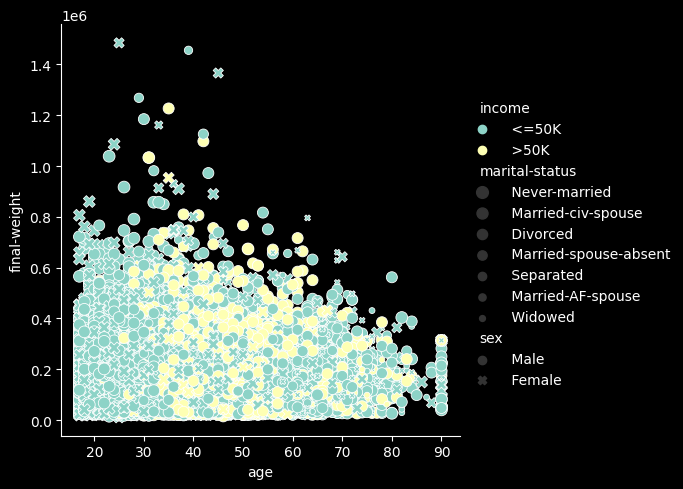

In [3]:
# Gráfico
sns.relplot(
    x='age', y='final-weight', data=ds,
    hue='income', style='sex', size='marital-status'
);

### Gráfico de barra e setor (pizza)

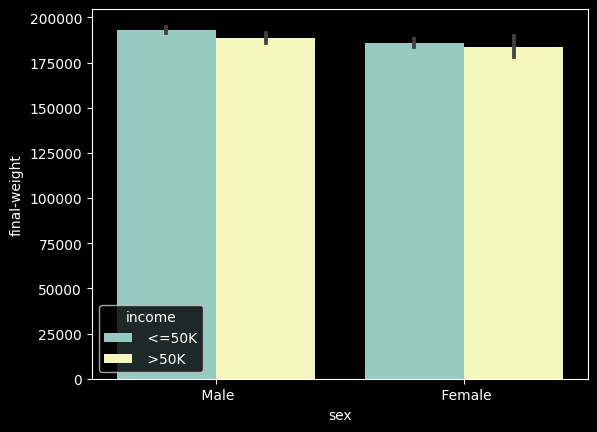

In [4]:
# Gráfico
sns.barplot(x='sex', y='final-weight', data=ds, hue='income'); # hue == agrupamento

In [5]:
# Agrupando os dados
ds_agrupados = ds.groupby(['income'])['education-num'].sum()
ds_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

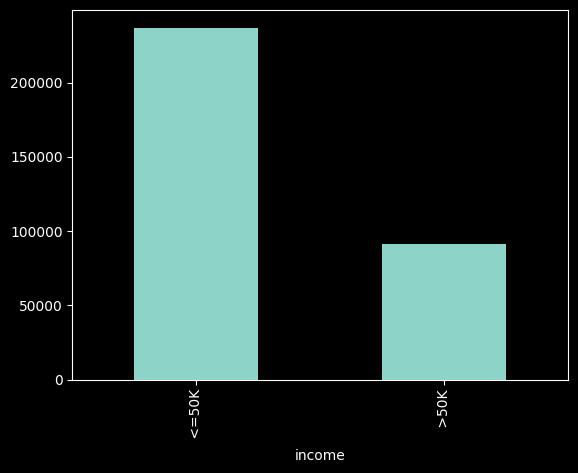

In [6]:
# Gráfico de barra
ds_agrupados.plot.bar();

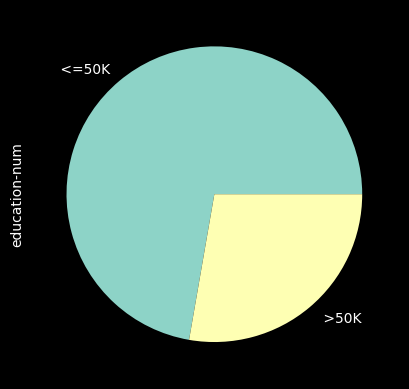

In [7]:
# Gráfico de pizza
ds_agrupados.plot.pie();

### Gráfico de Linha

In [8]:
# Gerando os dados
vendas = {
    'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
    'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])
}

In [9]:
# Transformando os dados em dataframe
vendas_df = pd.DataFrame(vendas)
vendas_df

,mes,valor
0,1,100
1,2,200
2,3,120
3,4,300
4,5,500
5,6,198
6,7,200
7,8,209
8,9,130
9,10,500


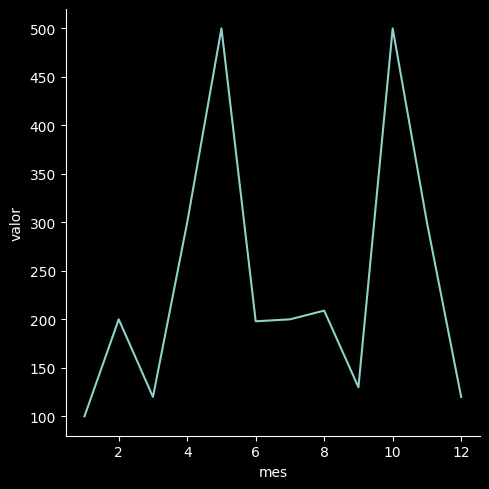

In [10]:
# Gráfico de linhas
sns.relplot(x='mes', y='valor', kind='line', data=vendas_df);

### Boxplot

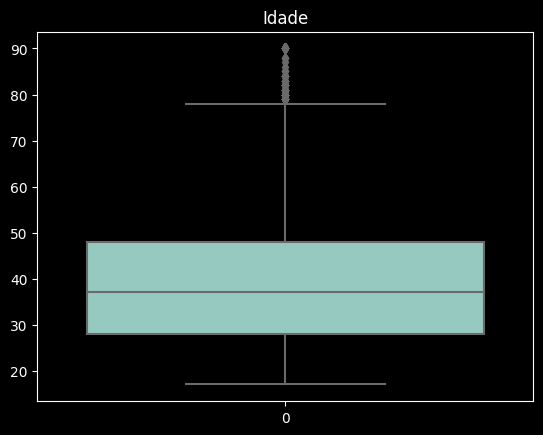

In [11]:
# Boxplot da idade do censo
sns.boxplot(ds['age']);
plt.title('Idade')
plt.show()

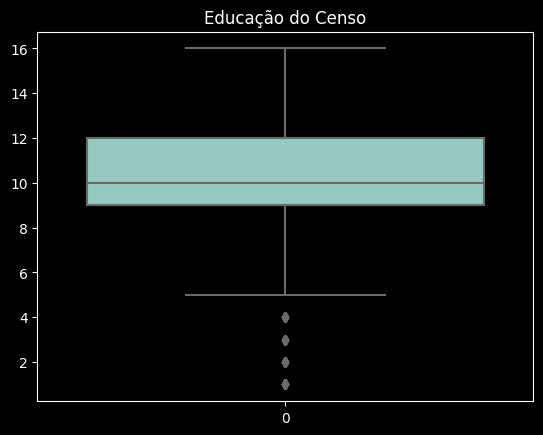

In [12]:
# Boxplot da educação do censo
sns.boxplot(ds['education-num']);
plt.title('Educação do Censo')
plt.show()

In [13]:
# Selecionado de varias colunas
ds2 = ds.iloc[:, [0, 4, 12]]
ds2.head()

,age,education-num,hour-per-week
0,39,13,40
1,50,13,13
2,38,9,40
3,53,7,40
4,28,13,40


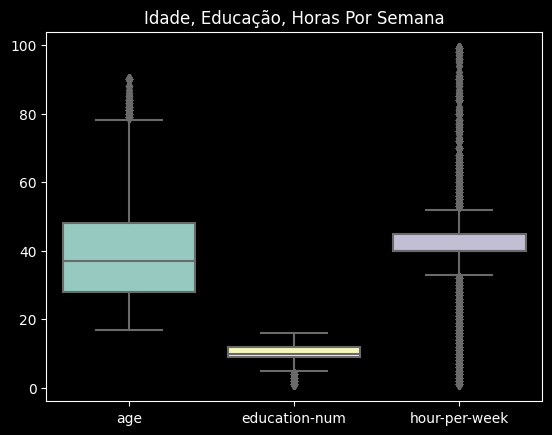

In [14]:
# Gerando o gráfico 
sns.boxplot(ds2);
plt.title('Idade, Educação, Horas Por Semana')
plt.show()

### Gráfico com atributos categóricos

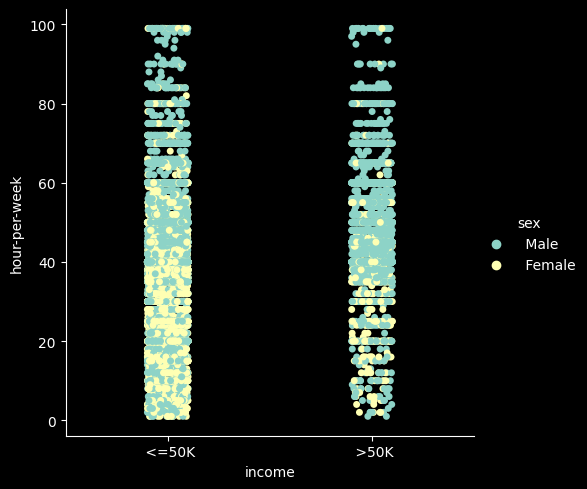

In [15]:
# Gráfico de renda por horas trabalhada agrupada por sexo
sns.catplot(x='income', y='hour-per-week', data=ds, hue='sex');

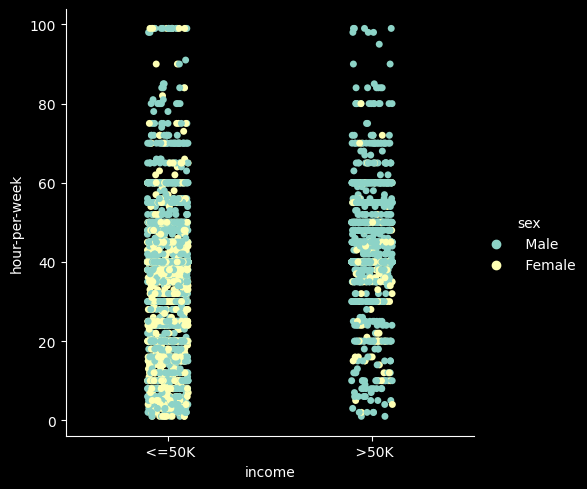

In [16]:
# Gráfico de renda por horas trabalhada agrupada por sexo filtrando por idade
sns.catplot(
    x='income', y='hour-per-week',
    data=ds.query('age>=50'), hue='sex'
);

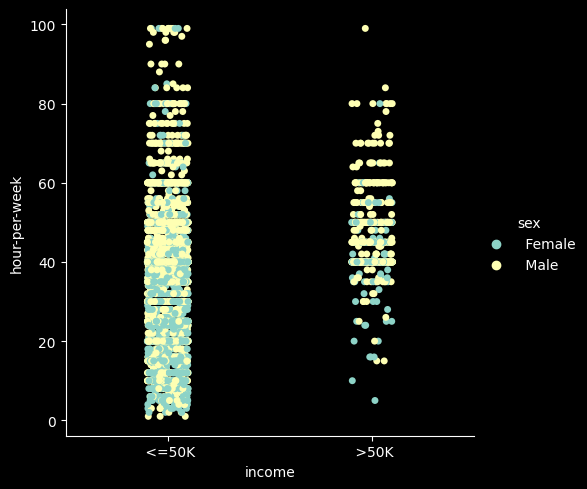

In [17]:
# Gráfico de renda por horas trabalhada agrupada por sexo filtrando por idade
sns.catplot(
    x='income', y='hour-per-week',
    data=ds.query('age<=30'), hue='sex'
);

### Subgráficos

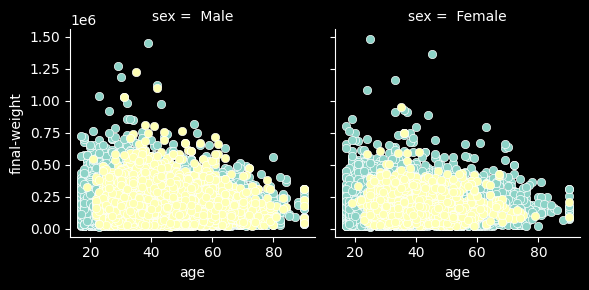

In [18]:
# Dois Gráfico de sexo agrupado por renda
g = sns.FacetGrid(ds, col='sex', hue='income')
g.map(sns.scatterplot, 'age', 'final-weight');

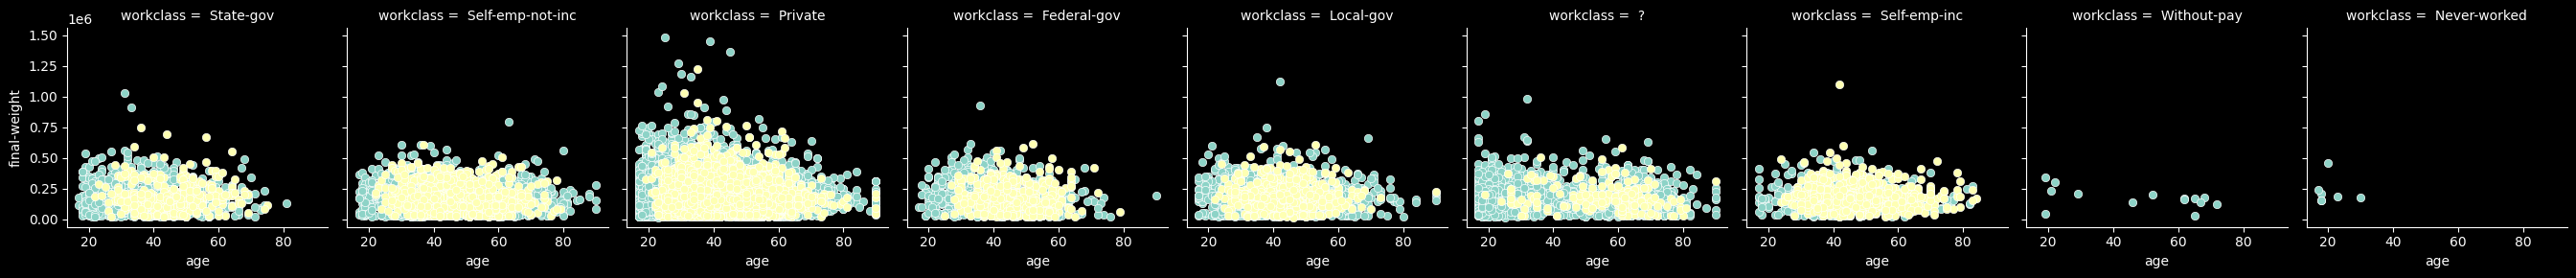

In [19]:
# Gerando vários gráficos de uma mesma coluna
g = sns.FacetGrid(ds, col='workclass', hue='income')
g.map(sns.scatterplot, 'age', 'final-weight');

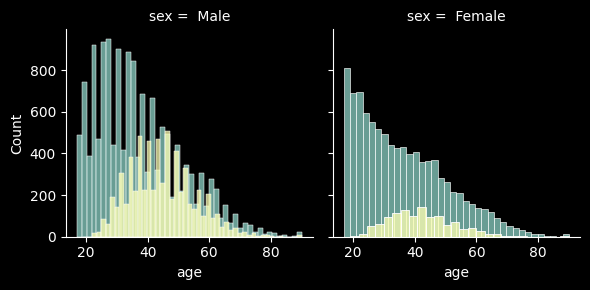

In [20]:
# Histograma 
g = sns.FacetGrid(ds, col='sex', hue='income')
g.map(sns.histplot, 'age');

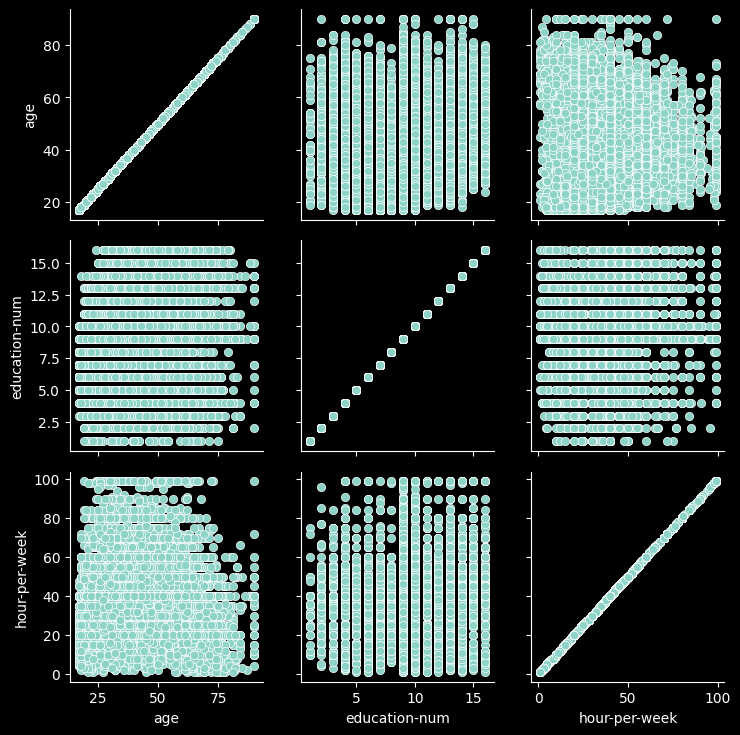

In [21]:
# Gerando vários gráficos de dispersão de párea 
g = sns.PairGrid(ds2)
g.map(sns.scatterplot);

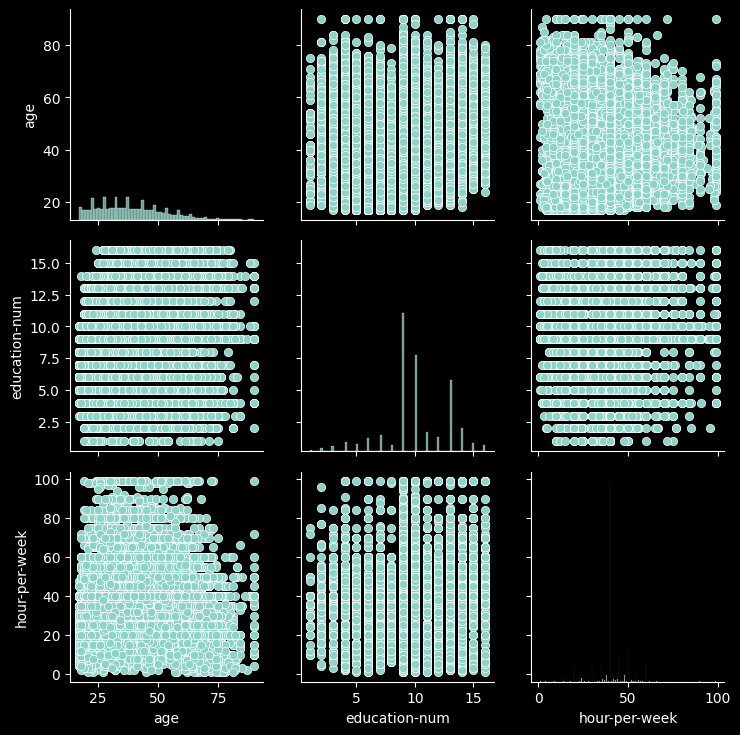

In [22]:
# Gerando vários gráficos de dispersão e histograma de párea 
g = sns.PairGrid(ds2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

### Mapas

In [23]:
# Importações
from mpl_toolkits.basemap import Basemap

In [24]:
# Base de dados
df = pd.read_csv('../Distribuições_Estatisticas/house_prices.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
# Descrição da coluna latitude 
df['lat'].describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [26]:
# Descrição da coluna longitude 
df['long'].describe()

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [27]:
# Obtendo os valores mínimos e máximos 
lat1, lat2 = df['lat'].min(), df['lat'].max()
lon1, lon2 = df['long'].min(), df['long'].max()

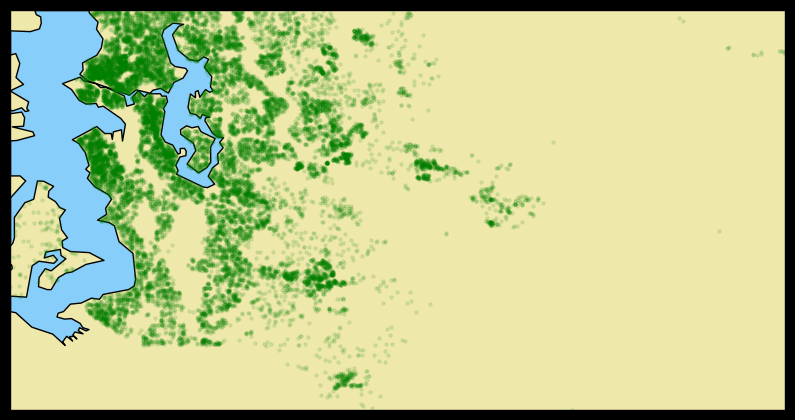

In [28]:
# Visualizando o mapa
plt.figure(figsize=(10, 10))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat=lat1, urcrnrlat=lat2,
            llcrnrlon=lon1, urcrnrlon=lon2)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(
    df['long'], df['lat'], s=5,
    c='green', alpha=0.1, zorder=2
);

In [29]:
# Ordenado os valores da coluna preço de forma decrescente
df_dcs = df.sort_values(by='price',  ascending=False)
df_dcs.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [30]:
# Selecionado as casas com maiores valores
df_caros = df_dcs[0:1000]
df_caros

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7271,8965520190,20141030T000000,1200000.0,3,2.50,3420,16622,1.0,0,4,...,10,2410,1010,1991,0,98006,47.5638,-122.105,3460,14566
9925,3623500049,20150501T000000,1200000.0,4,2.25,2320,13114,2.0,0,0,...,8,2320,0,1967,0,98040,47.5762,-122.239,2740,15000
5886,9808590460,20150218T000000,1200000.0,4,2.25,2860,10702,2.0,0,0,...,10,2860,0,1982,0,98004,47.6451,-122.189,2890,10572
19613,7525950110,20140828T000000,1200000.0,4,3.25,3850,19842,2.0,0,3,...,11,3180,670,1989,0,98074,47.6239,-122.065,4320,19500


In [31]:
# Ordenado os valores da coluna preço de forma crescente
df_cst = df.sort_values(by='price',  ascending=True)
df_cst.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


In [32]:
# Selecionado as casas com menores valores
df_baratos = df_cst[0:1000]
df_baratos

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19285,844001145,20150326T000000,208500.0,2,1.00,880,4814,1.0,0,0,...,5,880,0,1906,0,98010,47.3107,-121.999,1010,6160
303,5104530560,20150401T000000,208633.0,3,2.50,2040,3810,2.0,0,0,...,8,2040,0,2006,0,98038,47.3537,-122.000,2370,4590
20819,3336500140,20140919T000000,208800.0,3,2.50,1390,2450,2.0,0,0,...,7,1390,0,2009,0,98118,47.5298,-122.269,1390,2450
13595,425000175,20141013T000000,208950.0,3,1.00,960,5700,1.0,0,0,...,5,960,0,1956,0,98056,47.4983,-122.172,960,5700


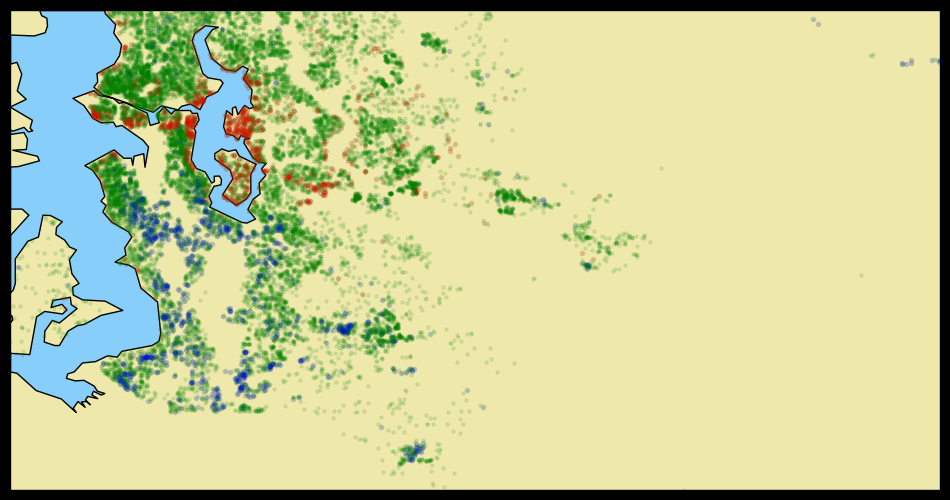

In [33]:
# Visualizando o mapa
plt.figure(figsize=(12, 12))
m = Basemap(
    projection='cyl', resolution='h',
    llcrnrlat=lat1, urcrnrlat=lat2,
    llcrnrlon=lon1, urcrnrlon=lon2
)
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(
    df['long'], df['lat'], s=5,
    c='green', alpha=0.1, zorder=2
)
m.scatter(
    df_caros['long'], df_caros['lat'], s=10,
    c='red', alpha=0.1, zorder=3
)
m.scatter(
    df_baratos['long'], df_baratos['lat'], s=10,
    c='blue', alpha=0.1, zorder=4
);